In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('heart (1).csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,?,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,?,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Data Cleaning

In [27]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
df = df.replace('?', np.nan)

In [29]:
df.isna().sum()

age         0
sex         0
cp          1
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       1
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
df = df.fillna(0)

### Outlier Detection

In [31]:
print('Highest allowed', df.chol.mean()+3*df.chol.std())
print('Lowest allowed', df.chol.mean()-3*df.chol.std())

Highest allowed 400.77753061854617
Lowest allowed 91.2224693814538


In [32]:
df[(df['chol']>400) | (df['chol']<91)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
641,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
665,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
685,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [33]:
df = df[(df.chol<=400) & (df.chol>=27)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Transormation

In [34]:
df['oldpeak'] = df['oldpeak'].apply(lambda x: round(x))
df['oldpeak']

0       1
1       3
2       3
3       0
4       2
       ..
1020    0
1021    3
1022    1
1023    0
1024    1
Name: oldpeak, Length: 1012, dtype: int64

### Data model (KNN)

In [35]:
x = df.iloc[:,:13].values
x
y = df['target'].values

In [36]:
from sklearn.model_selection import train_test_split
xtr, xte,ytr,yte = train_test_split(x,y,test_size=0.25)

In [37]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
xtr = scal.fit_transform(xtr)
xte = scal.transform(xte)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
m1 = KNeighborsClassifier(n_neighbors=7)


In [39]:
m1.fit(xtr, ytr)

KNeighborsClassifier(n_neighbors=7)

In [40]:
ypred = m1.predict(xte)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
accuracy_score(ypred, yte)

0.841897233201581

In [45]:
confusion_matrix(ypred, yte)

array([[ 96,  12],
       [ 28, 117]], dtype=int64)

### Data Visualization

Histogram

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


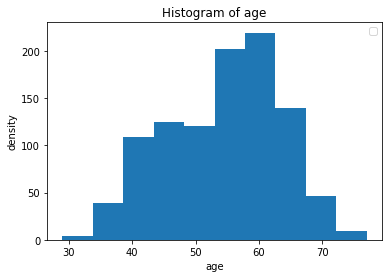

In [51]:
plt.hist(df.age)
plt.title("Histogram of age")
plt.xlabel("age")
plt.ylabel("density")
plt.show()

C:\Users\Disha Chavan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

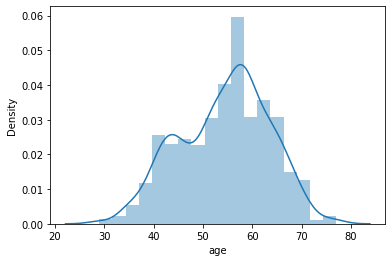

In [52]:
sns.distplot(df.age)

Dot plot

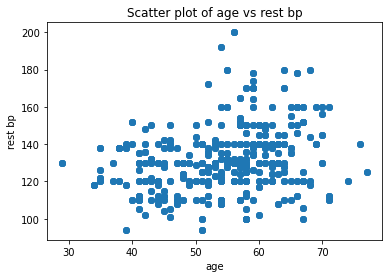

In [60]:
plt.scatter(df.age, df.trestbps)
plt.title("Scatter plot of age vs rest bp")
plt.xlabel("age")
plt.ylabel("rest bp")
plt.show()

Bar plot

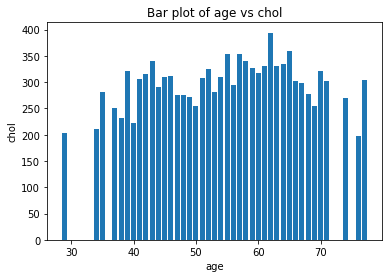

In [61]:
plt.bar(df.age, df.chol)
plt.title("Bar plot of age vs chol")
plt.xlabel("age")
plt.ylabel("chol")
plt.show()

Line chart

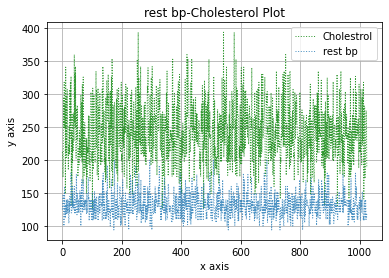

In [79]:
df.chol.plot(kind = 'line', color = 'g', label = 'Cholestrol',linewidth = 1, alpha = 0.8, grid = True, linestyle = ':')
df.trestbps.plot(kind='line', label='rest bp', linewidth=1,alpha = 0.8, grid = True, linestyle = ':' )
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('rest bp-Cholesterol Plot')
plt.show()

Histogram to box plot

C:\Users\Disha Chavan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Disha Chavan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

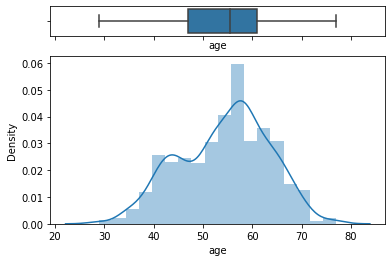

In [104]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.age, ax=ax_box)
sns.distplot(df.age, ax=ax_hist)


C:\Users\Disha Chavan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Disha Chavan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


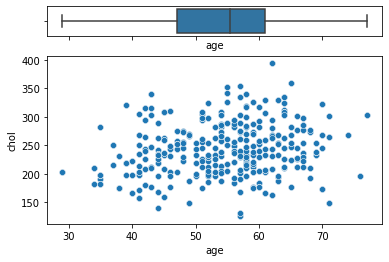

In [106]:
f, (ax_box, ax_scat) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df.age, ax=ax_box)
sns.scatterplot(df.age, df.chol, ax=ax_scat)
plt.show()

Pie Chart

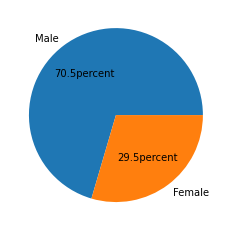

In [125]:
data1 = [df.sex[df.sex==1].count(),df.sex[df.sex==0].count()]
plt.pie(data1, labels=['Male', 'Female'],autopct='%.1fpercent')
plt.show()

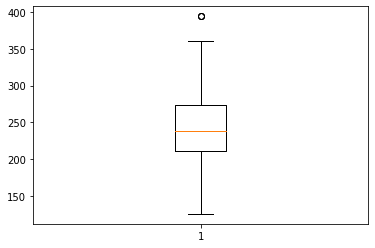

In [131]:
plt.boxplot(df.chol)
plt.show()